# King County, WA Home Sales
Matthew Ringel  
18 November 2016  
Data: https://www.kaggle.com/harlfoxem/housesalesprediction  
Metadata: http://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r     
Inspiration: https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

## Initial Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import geopandas as gpd

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('data/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
for column in data.columns:
    print(data[column].hasnans)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


### Awesome, no NaNs
(That date column, though...)

In [6]:
type(data.date[0])

str

In [7]:
date_object = datetime.strptime('20141013T000000', '%Y%m%dT%f')

In [8]:
date_object

datetime.datetime(2014, 10, 13, 0, 0)

yay!

In [9]:
data['dateObject'] = [datetime.strptime(date, '%Y%m%dT%f') for date in data['date']]

In [10]:
type(data.dateObject[0])

pandas.tslib.Timestamp

### Waterfront

In [11]:
data.waterfront.unique()

array([0, 1])

### View

In [12]:
data.view.unique()

array([0, 3, 4, 2, 1])

### Condition
BUILDING CONDITION
    	Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. 

In [13]:
data.condition.unique()

array([3, 5, 4, 1, 2])

### What is this "grade" field?

In [14]:
np.sort(data.grade.unique())

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

From: http://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

BUILDING GRADE
    	Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

### yr_built

In [15]:
data.yr_built.min()

1900

In [16]:
data.yr_built.max()

2015

In [17]:
len(data[data.yr_built == 1900])

87

## Exploratory Analysis

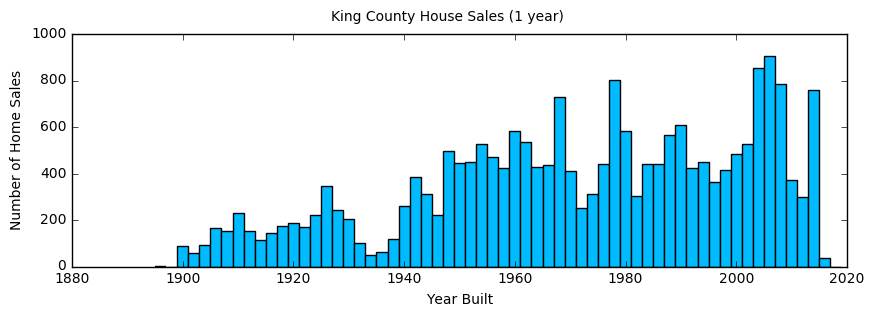

In [84]:
plt.figure(figsize=(10, 3))
plt.hist(data.yr_built, bins=np.arange(1895, 2020, 2), color="#00BBFF")
plt.xlabel("Year Built")
plt.ylabel("Number of Home Sales")
plt.suptitle("King County House Sales (1 year)")
plt.show()

In [19]:
data.dateObject.min()

Timestamp('2014-05-02 00:00:00')

In [20]:
data.dateObject.max()

Timestamp('2015-05-27 00:00:00')

Data represent approximately one year of home sales, from 2 May 2014 to 27 May 2015.

In [21]:
print(data.price.min(), data.price.max())

75000.0 7700000.0


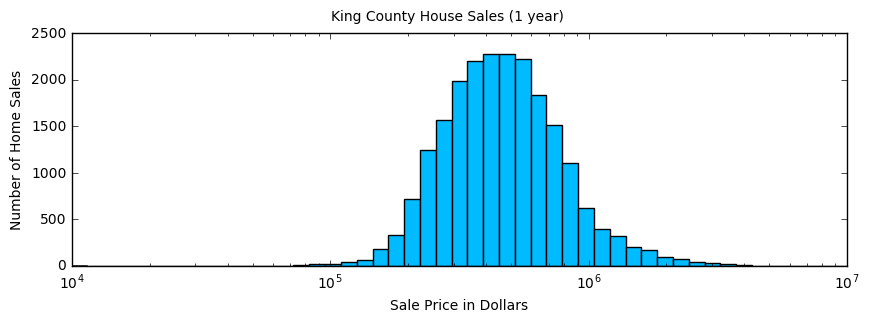

In [86]:
plt.figure(figsize=(10, 3))
plt.hist(data.price, bins=np.logspace(4, 7), color="#00BBFF")
plt.xlabel("Sale Price in Dollars")
plt.ylabel("Number of Home Sales")
plt.suptitle("King County House Sales (1 year)")
plt.xscale('log')
plt.show()

In [23]:
stats.mstats.normaltest(data.price)

NormaltestResult(statistic=19121.788941861127, pvalue=0.0)

In [24]:
x = stats.norm.rvs(size = 1000)

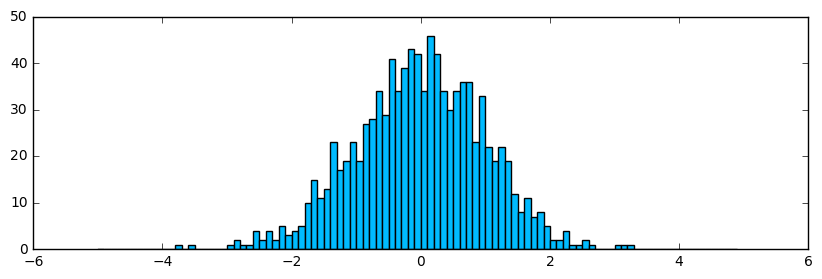

In [25]:
plt.figure(figsize=(10, 3))
plt.hist(x, bins=np.arange(-5, 5, 0.1), color="#00BBFF")
#plt.xlabel("Sale Price")
#plt.ylabel("Number of Home Sales")
#plt.suptitle("King County House Sales (1 year)")
#plt.xscale('log')
plt.show()

In [26]:
stats.mstats.normaltest(x)

NormaltestResult(statistic=5.3115427046005665, pvalue=0.070244634402295822)

In [27]:
log_price = np.log10(data.price)

In [28]:
stats.mstats.normaltest(log_price)

NormaltestResult(statistic=852.18187308848405, pvalue=8.9342370196671737e-186)

### Legitimately confused right now why this is failing the normal test.  Moving on...

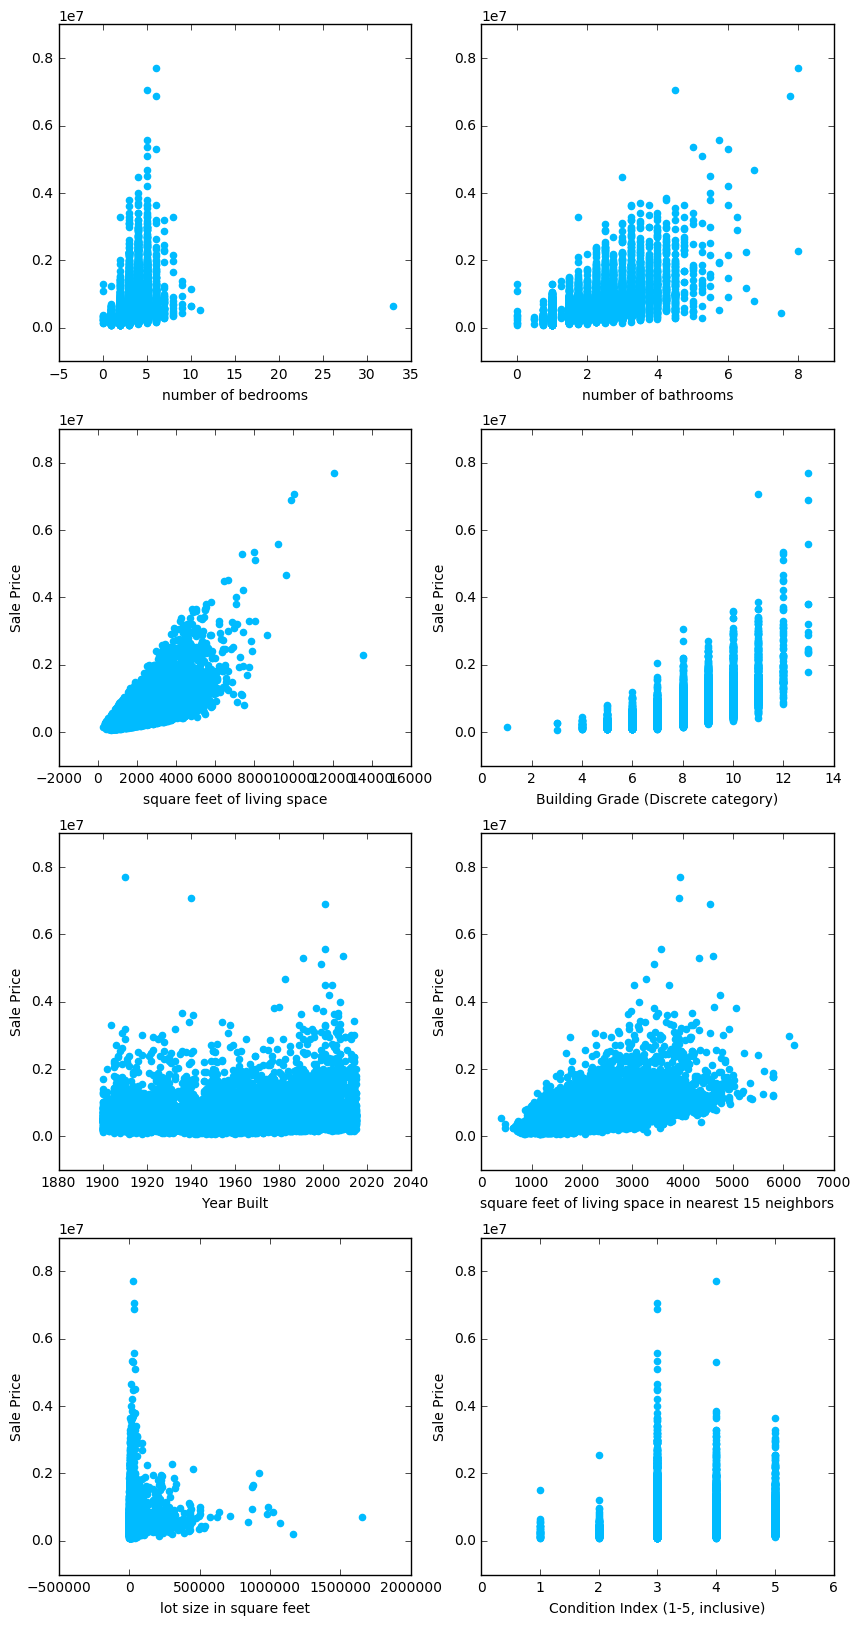

In [29]:
plt.figure(figsize=(10,20))
plt.subplot(421)
plt.scatter(data.bedrooms, data.price, color='#00BBFF')
plt.xlabel('number of bedrooms')

plt.subplot(422)
plt.scatter(data.bathrooms, data.price, color='#00BBFF')
plt.xlabel('number of bathrooms')

plt.subplot(423)
plt.scatter(data.sqft_living, data.price, color='#00BBFF')
plt.xlabel('square feet of living space')
plt.ylabel('Sale Price')

plt.subplot(424)
plt.scatter(data.grade, data.price, color='#00BBFF')
plt.xlabel('Building Grade (Discrete category)')
plt.ylabel('Sale Price')

plt.subplot(425)
plt.scatter(data.yr_built, data.price, color='#00BBFF')
plt.ylabel('Sale Price')
plt.xlabel('Year Built')

plt.subplot(426)
plt.scatter(data.sqft_living15, data.price, color='#00BBFF')
plt.xlabel('square feet of living space in nearest 15 neighbors')
plt.ylabel('Sale Price')

plt.subplot(427)
plt.scatter(data.sqft_lot, data.price, color='#00BBFF')
plt.xlabel('lot size in square feet')
plt.ylabel('Sale Price')

plt.subplot(428)
plt.scatter(data.condition, data.price, color='#00BBFF')
plt.xlabel('Condition Index (1-5, inclusive)')
plt.ylabel('Sale Price')

plt.show()

## But are these variables independent from each other?


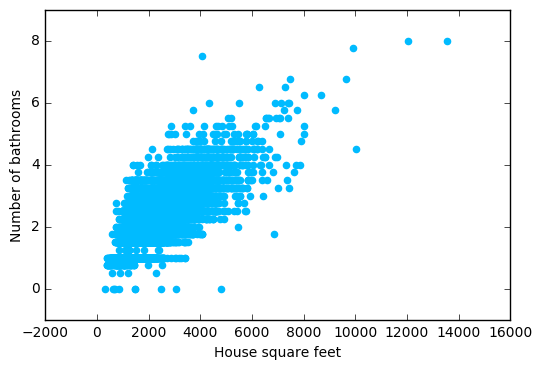

In [30]:
plt.scatter(data.sqft_living, data.bathrooms, color="#00BBFF")
plt.xlabel("House square feet")
plt.ylabel("Number of bathrooms")
plt.show()

Not surprising that bigger houses tend to have more bathrooms...
## number of bathrooms is correlated with size in square feet, therefore not independent variables

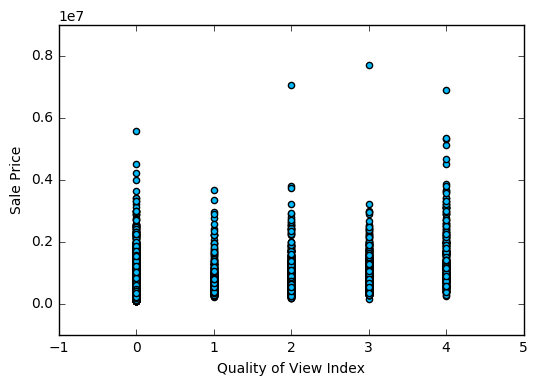

In [31]:
plt.scatter(data.view, data.price, c="#00BBFF")
plt.xlabel("Quality of View Index")
plt.ylabel("Sale Price")
plt.show()

### the quality of the view doesn't appear to have much impact on sale price

### maybe include year renovated?

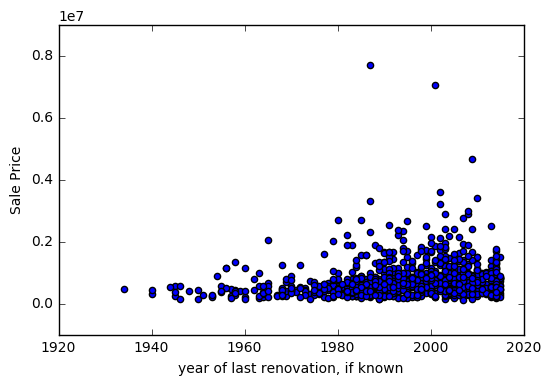

In [32]:
plt.scatter(data.yr_renovated[data['yr_renovated'] > 0], data.price[data['yr_renovated'] > 0])
plt.xlabel('year of last renovation, if known')
plt.ylabel('Sale Price')
plt.show()

## Data Modeling

Start with a simple linear regression of sale price as a function of square feet of living space.

In [33]:
regress_1 = LinearRegression()

In [34]:
regress_1.fit(data.sqft_living.reshape(-1,1), data.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
regress_1.coef_

array([ 280.6235679])

In [36]:
regress_1.intercept_

-43580.743094473844

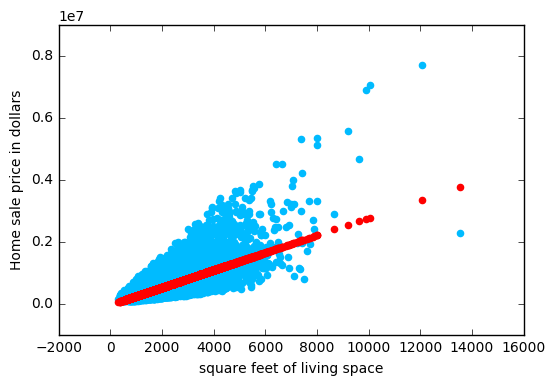

In [37]:
plt.scatter(data.sqft_living, data.price, color='#00BBFF')
plt.xlabel('square feet of living space')
plt.ylabel('Home sale price in dollars')
plt.scatter(data.sqft_living, regress_1.predict((data.sqft_living).reshape(-1,1)), color='red')
#plt.yscale('log')

plt.show()

### Define some helper functions

In [38]:
def chisq_dof(data, model, dof):
    """Returns the chi squared per degrees of freedom and chi squared given input data, model, 
    and degrees of freedom"""
    return ((data - model)**2/model**2).sum()/(len(data)-dof), ((data - model)**2/model**2).sum()

In [39]:
def AIC(data, chi_sq, k):
    """returns the Aikake Inference Criterion (AIC) given a data set, chi squared, and k"""
    return -2 * chi_sq + 2*k + (2*k*(k+1))/(len(data)-k-1)

### Model goodness of fit and goodness of model

In [40]:
print("Mean squared error: %.2e" % np.mean((regress_1.predict(data.sqft_living.reshape(-1,1)) - data.price) ** 2))

Mean squared error: 6.84e+10


In [41]:
chisq_dof1, chisq1 = chisq_dof(data.price, regress_1.predict(data.sqft_living.reshape(-1,1)), 2)

In [42]:
print ("Chi squared per degrees of freedom: %.3f \nChi squared: %.3f" % (chisq_dof1, chisq1))

Chi squared per degrees of freedom: 0.209 
Chi squared: 4523.200


In [43]:
print("AIC: %.2f" % AIC(data, chisq1, 2))

AIC: -9042.40


### Try adding another variable, square feet of living space in the nearest 15 houses (proxy for "niceness" of neighborhood)

In [44]:
regress2 = LinearRegression()

regress2.fit(data[["sqft_living", "sqft_living15"]], data["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

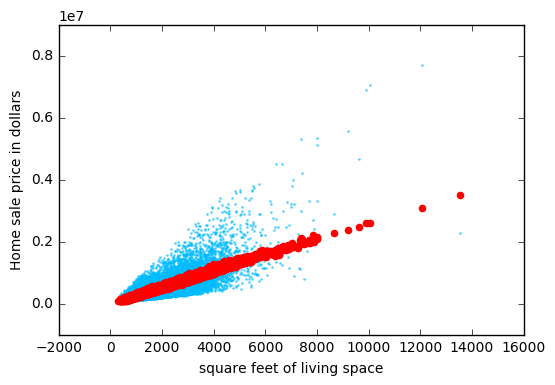

In [89]:
plt.scatter(data.sqft_living, data.price, color='#00BBFF', s = 1, alpha=0.5)
plt.xlabel('square feet of living space')
plt.ylabel('Home sale price in dollars')
plt.scatter(data.sqft_living, regress2.predict(data[["sqft_living", "sqft_living15"]]), color='red')

plt.show()

In [46]:
print("Mean squared error: %.2e" % np.mean((regress2.predict(data[["sqft_living", "sqft_living15"]]) - data.price) ** 2))


Mean squared error: 6.74e+10


In [47]:
chisq_dof2, chisq2 = chisq_dof(data.price, regress2.predict(data[["sqft_living", "sqft_living15"]]), 3)

In [48]:
print ("Chi squared per degrees of freedom: %.3f \nChi squared: %.3f" % (chisq_dof2, chisq2))

Chi squared per degrees of freedom: 0.197 
Chi squared: 4249.277


In [49]:
print("AIC: %.2f" % AIC(data, chisq2, 3))

AIC: -8492.55


### Chi squared per degrees of freedom went down. AIC is slightly higher.  Not a significantly better model.
### Let's try with sqft_living and grade

In [50]:
regress3 = LinearRegression()

In [51]:
regress3.fit(data[["sqft_living", "grade"]], data["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

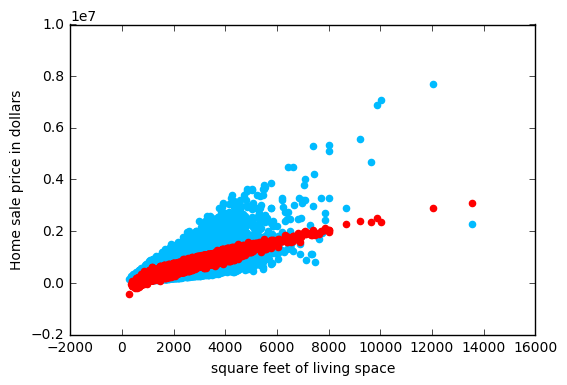

In [52]:
plt.scatter(data.sqft_living, data.price, color='#00BBFF')
plt.xlabel('square feet of living space')
plt.ylabel('Home sale price in dollars')
plt.scatter(data.sqft_living, regress3.predict(data[["sqft_living", "grade"]]), color='red')

plt.show()

In [53]:
print("Mean squared error: %.2e" % np.mean((regress3.predict(data[["sqft_living", "grade"]]) - data.price) ** 2))


chisq_dof3, chisq3 = chisq_dof(data.price, regress3.predict(data[["sqft_living", "grade"]]), 3)

print ("Chi squared per degrees of freedom: %.3f \nChi squared: %.3f" % (chisq_dof3, chisq3))

print("AIC: %.2f" % AIC(data, chisq3, 3))

Mean squared error: 6.27e+10
Chi squared per degrees of freedom: 107.621 
Chi squared: 2325683.768
AIC: -4651361.53


### Mean squared error is lowest but Chi squared went up to 100

### Switch gears for a bit...

In [54]:
zipcodes = data.zipcode.unique()
print(zipcodes)

[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


In [55]:
len(zipcodes)

70

In [56]:
mean_price_by_zip = []
for zipcode in zipcodes:
    mean_price_by_zip.append(data.price[data.zipcode == zipcode].mean())

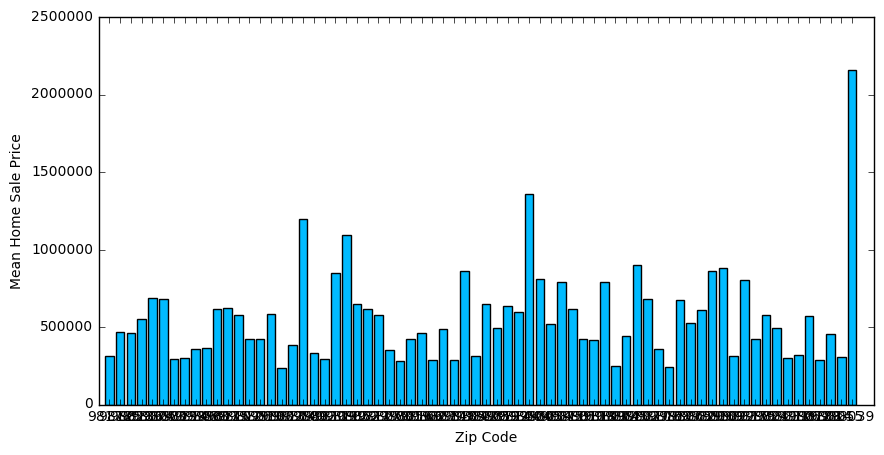

In [57]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(0, 70, 1), mean_price_by_zip, color='#00BBFF', align='center')
#plt.yscale('log')
plt.xlim(-1,71)
plt.xticks(np.arange(0, 70, 1), zipcodes)
plt.xlabel('Zip Code')
plt.ylabel('Mean Home Sale Price')

plt.show()

In [58]:
zipped = zip(zipcodes, mean_price_by_zip)

In [59]:
zipped = zip(zipcodes, mean_price_by_zip)
for pair in list(zipped):
    if pair[1] > 1E6:
        print(pair)

(98040, 1194230.0212765958)
(98112, 1095499.342007435)
(98004, 1355927.0820189274)
(98039, 2160606.6)


In [60]:
data['zipcode_mean_price'] = 0

In [61]:
for zipcode in zipcodes:
    data['zipcode_mean_price'][data.zipcode == zipcode] = data.price[data.zipcode == zipcode].mean()

/home/matthew/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


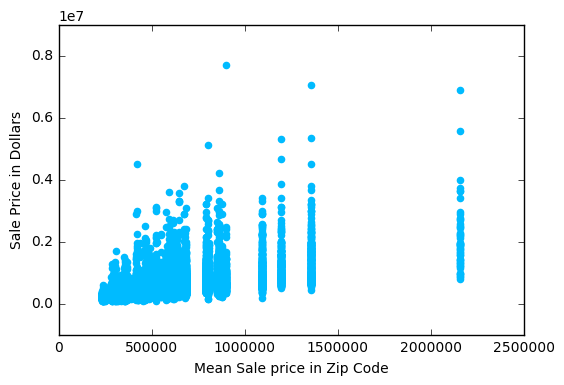

In [62]:
plt.scatter(data.zipcode_mean_price, data.price, color="#00BBFF")
#plt.yscale('log')
plt.xlabel('Mean Sale price in Zip Code')
plt.ylabel('Sale Price in Dollars')

plt.show()

### Ok.  Let's try a multiple linear regression using size and zipcode mean price
(That is, can the size of the house and mean sales price of houses in the same zip code predict the sale price of the house?)

In [63]:
regress4 = LinearRegression()

regress4.fit(data[["sqft_living", "zipcode_mean_price"]], data["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

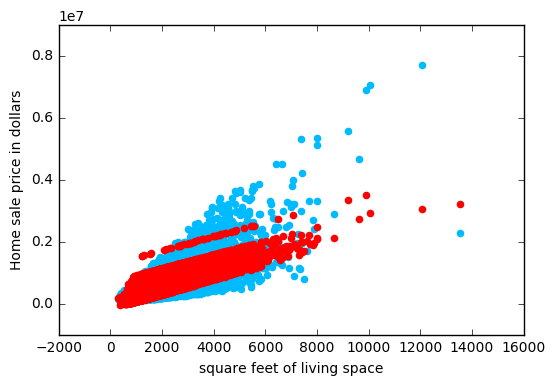

In [64]:
plt.scatter(data.sqft_living, data.price, color='#00BBFF')
plt.xlabel('square feet of living space')
plt.ylabel('Home sale price in dollars')
plt.scatter(data.sqft_living, regress4.predict(data[["sqft_living", "zipcode_mean_price"]]), color='red')

plt.show()

In [65]:
print("Mean squared error: %.2e" % np.mean((regress4.predict(data[["sqft_living", "zipcode_mean_price"]]) - data.price) ** 2))

chisq_dof4, chisq4 = chisq_dof(data.price, regress4.predict(data[["sqft_living", "zipcode_mean_price"]]), 3)

print ("Chi squared per degrees of freedom: %.3f \nChi squared: %.3f" % (chisq_dof4, chisq4))

print("AIC: %.2f" % AIC(data, chisq4, 3))

Mean squared error: 4.11e+10
Chi squared per degrees of freedom: 50.590 
Chi squared: 1093251.599
AIC: -2186497.20


### Previous best
Mean squared error: 6.27e+10  
Chi squared per degrees of freedom: 107.621   
Chi squared: 2325683.768  
AIC: -4651361.53  

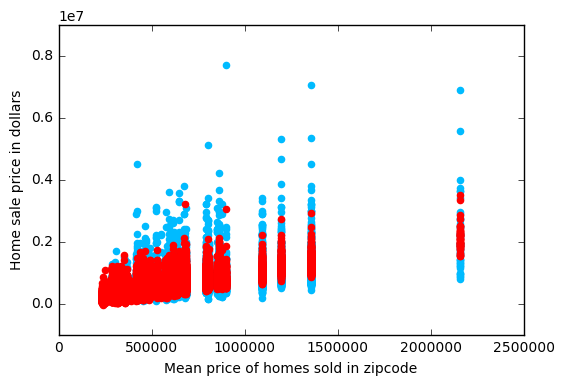

In [66]:
plt.scatter(data.zipcode_mean_price, data.price, color='#00BBFF')
plt.xlabel('Mean price of homes sold in zipcode')
plt.ylabel('Home sale price in dollars')
plt.scatter(data.zipcode_mean_price, regress4.predict(data[["sqft_living", "zipcode_mean_price"]]), color='red')


plt.show()

In [67]:
zipcodes_geo = gpd.read_file('data/zipcode/zipcode.shp')

In [68]:
zipcodes_geo_merged = pd.merge(zipcodes_geo, data, left_on='ZIP', right_on='zipcode')

In [82]:
zipcodes_geo_merged.columns

Index(['COUNTY', 'Shape_area', 'Shape_len', 'ZIP', 'ZIPCODE', 'ZIP_TYPE',
       'geometry', 'id', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'zipcode_mean_price'],
      dtype='object')

In [81]:
zipcodes_geo_merged.drop(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living'], axis=1, inplace=True)

In [80]:
zipcodes_geo_merged.to_file('kingcountyhomeprices.shp')

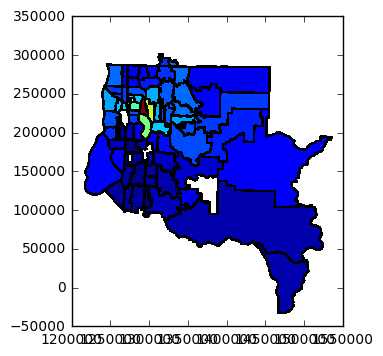

In [83]:
zipcodes_geo_merged.plot(column='zipcode_mean_price')
plt.show()